Assignment 3: Full Bayesian Inference

Deadline: October 7, 2019 (Monday) at 5pm

Karolina Bargiel

Part 1: Full Bayesian Inference

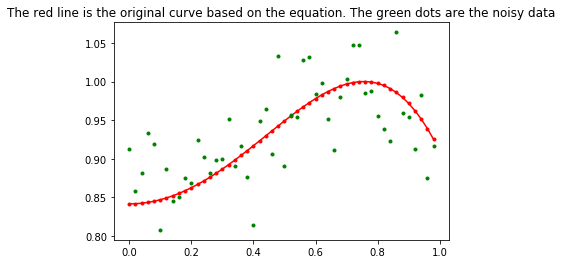

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
range_of_data = 1

 # 1. Generate 50 2D-data points using the following function:  y = sin (x^2 +1)
def actual_distribution():
    x = np.arange(0, 1, 0.02)
    np.random.seed(0) 
    y = np.sin(x**2 +1)
   
    return x, y

# 2. Add Gaussian random noise to the data

def add_noise(y_curve):
    mu =0
    sigma = 0.04
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    
    
    return y_noise

#3. Show the original curve line and the noisy data.

import matplotlib.pyplot as plt
x, y = actual_distribution()
t = add_noise(y)
plt.plot(x, y, "r")
plt.plot(x, y, "r.")
plt.plot(x, t, "g.")
plt.title("The red line is the original curve based on the equation. The green dots are the noisy data")

plt.show()

In [13]:
#4. Compute w based on the full Bayesian inference (by using basis functions like discussed in class).
import numpy as np
range_of_data = 1
def get_mu(i, M):
    mu = i * (range_of_data / M )
    
    return mu


def fay(x, mu, S): 
    xf = np.exp(-(((x-mu)**2))/(2*(S**2)))
                  
    return xf

M = 4
S = 0.4
N = len(x)
F = np.empty([N, M])
for i in range(M):
    for j in range(N):
        F[j, i] = (fay(x[j], get_mu(i, M), S))
        
T = F.transpose()
alfa= 0.001
beta = 0.1
alfa_over_beta =alfa/beta
II = np.identity(M)

Inv_2 = np.linalg.inv(alfa*II + beta *(np.matmul(T, F)))
H = beta * Inv_2
Help = np.matmul(H, T)
w = np.matmul(Help, t)

#5.Display the estimated values of w


print(w)


y_new = np.matmul(F, w)

[ 0.92768108 -0.11940943 -0.37482186  1.21057653]


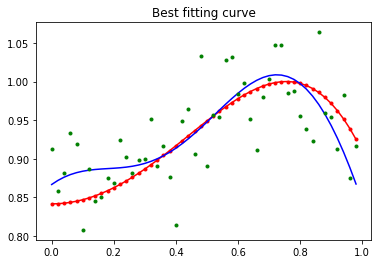

In [14]:
plt.plot(x, y, "r")
plt.plot(x, y, "r.")
plt.plot(x, y_new, "b")
plt.plot(x, t, "g.")
plt.title("Best fitting curve")
plt.show()
#7.Show the best fitting curve

6.Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results.


During my experiment I have noticed that in order for a curve to fit well we need to keep the ratio between alpha and beta lower than 1. 
1/beta is a component of standard deviation likelihood, while alfa represents standard deviation of our w, which determines the model we are using. This components due to the process of regularization can prevent the model from overfitting even for a really high M. 


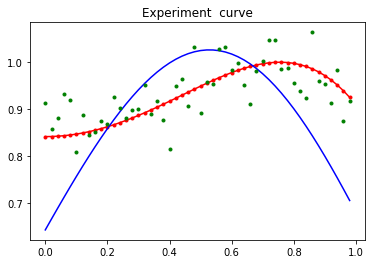

In [15]:
M = 15
S = 0.4
N = len(x)
F = np.empty([N, M])
for i in range(M):
    for j in range(N):
        F[j, i] = (fay(x[j], get_mu(i, M), S))
        
T = F.transpose()
alfa= 2
beta = 0.2
alfa_over_beta =alfa/beta
II = np.identity(M)

Inv_2 = np.linalg.inv(alfa*II + beta *(np.matmul(T, F)))
H = beta * Inv_2
Help = np.matmul(H, T)
w = np.matmul(Help, t)
y_new = np.matmul(F, w)

plt.plot(x, y, "r")
plt.plot(x, y, "r.")
plt.plot(x, y_new, "b")
plt.plot(x, t, "g.")
plt.title("Experiment  curve")
plt.show()

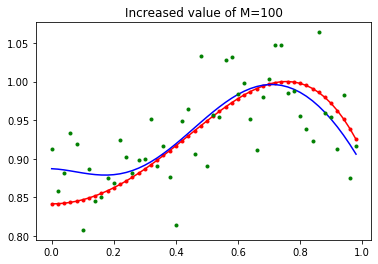

In [16]:
#8. Increase the value of M, and discuss how it affects the prediction (curve fitting) and the uncertainty of the prediction.
M = 100
S = 0.4
N = len(x)
F = np.empty([N, M])
for i in range(M):
    for j in range(N):
        F[j, i] = (fay(x[j], get_mu(i, M), S))
        
T = F.transpose()
alfa= 0.1
beta = 1/((0.05)**2)
alfa_over_beta =alfa/beta
II = np.identity(M)

Inv_2 = np.linalg.inv(alfa*II + beta *(np.matmul(T, F)))
H = beta * Inv_2
Help = np.matmul(H, T)
w = np.matmul(Help, t)
y_new = np.matmul(F, w)

plt.plot(x, y, "r")
plt.plot(x, y, "r.")
plt.plot(x, y_new, "b")
plt.plot(x, t, "g.")
plt.title("Increased value of M=100")
plt.show()


From the above experiment we can deduct that the increase of M is not affecting the change of the curve significantly, as long as alfa and beta component stays high. The above is an example of regularization.Regularization is a technique used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting. In our example the use of alfa and beta to minimalize the overfitting problem even for large values of M.  

9.Explain how useful p(w|t) for the training and testing stages.

Full Balysian gives us the probability p(w|t) (probability of w given t). That is its advantage over MAP. However the p(w|t) gives only the prediction for training stage, thus it is not useful in testing stage.

Part 2: Sequential Bayesian Learning

In [17]:
# 1. Generate 50 2D-data points using the following function:  y = sin (x^2 +1)
def actual_distribution():
    x = np.arange(0, 1, 0.02)
    np.random.seed(0) 
    y = np.sin(x**2 +1)
   
    return x, y

# 2. Add Gaussian random noise to the data

def add_noise(y_curve):
    mu =0
    sigma = 0.04
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    
    
    return y_noise


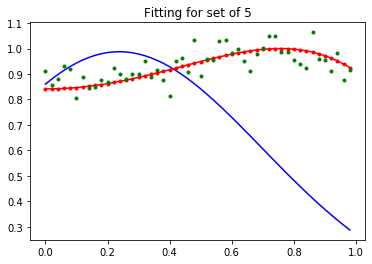

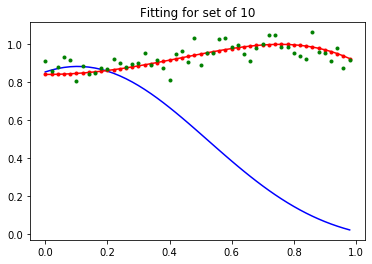

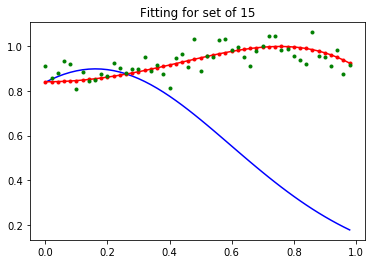

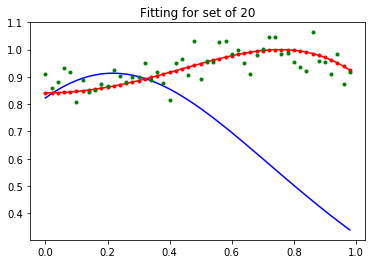

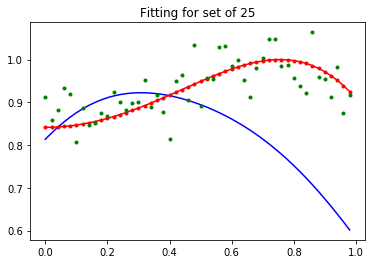

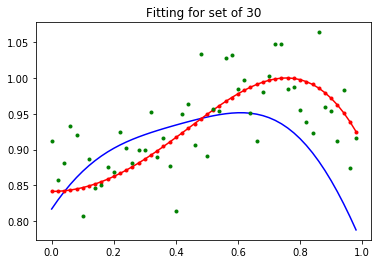

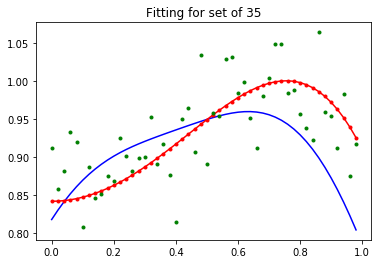

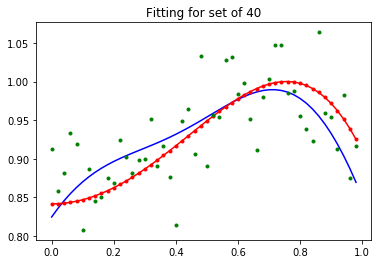

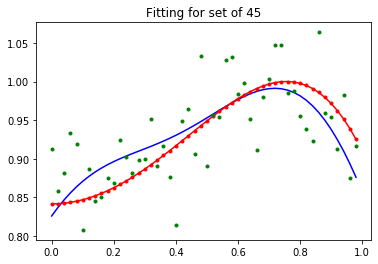

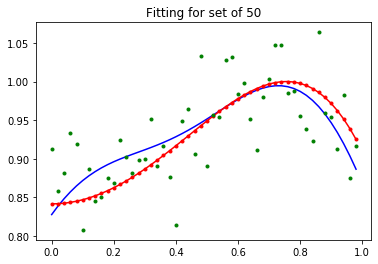

In [18]:
#Fit the generated noisy data sequentially (5 data for each sequence).
import numpy as np
M = 10
N = len(x)
range_of_data = 1
alfa =0.1
beta = 1

F_2 = np.matrix(np.empty([N, M])) 
S_a = 0.4
for i in range(M):
    for j in range(N):
        F_2[j, i] = fay(x[j], get_mu(i, M), S_a)


II_n =  np.matrix(np.identity(M))        
S = (alfa*II_n)

w_0 = 0*np.matrix(np.empty([M, 1]))

for i in range(N):
    t1 =  beta * np.matmul(F_2[i].transpose(), F_2[i])

    S_new = S + t1
    tmp = np.linalg.inv(S_new)
    w_new = np.matmul(tmp, (np.matmul(S,w_0)+ beta * F_2[i].transpose() * t[i]))
    w_0 = w_new
    S = S_new
    if i % 5 == 4:
        y_new = np.matmul(F_2, w_new)
        plt.plot(x, y_new, "b")
        plt.plot(x, y, "r")
        plt.plot(x, y, "r.")
        plt.plot(x, t, "g.")
        plt.title("Fitting for set of " + str(i+1))
        plt.show()


5.Discuss how to set M and the basis function's parameters in sequential learning

As we are using basis function we can set M high enough that it can curve properly to our input, but not too high to avoid the overfitting problem. The basis function parameters should cover all of the range of data, so we can properly fit in our function. We should also ensure that our mu is matches our expressiveness of m, so that we have enough basis functions ( in our case gaussians ) that can express our prediction. So we adjust our mu to the range of data , as well as given M. 

Part 3: Predictive Distribution

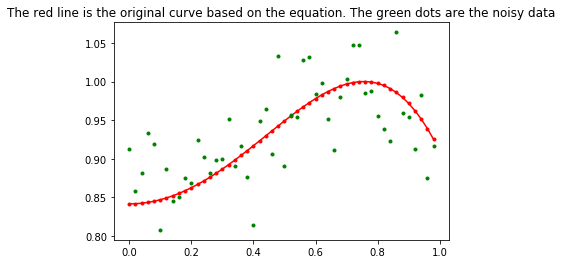

In [19]:
 # 1. Generate 50 2D-data points using the following function:  y = sin (x^2 +1)
def actual_distribution():
    x = np.arange(0, 1, 0.02)
    np.random.seed(0) 
    y = np.sin(x**2 +1)
   
    return x, y

# 2. Add Gaussian random noise to the data

def add_noise(y_curve):
    mu =0
    sigma = 0.04
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    
    
    return y_noise

#3. Show the original curve line and the noisy data.

import matplotlib.pyplot as plt
x, y = actual_distribution()
t = add_noise(y)
plt.plot(x, y, "r")
plt.plot(x, y, "r.")
plt.plot(x, t, "g.")
plt.title("The red line is the original curve based on the equation. The green dots are the noisy data")

plt.show()

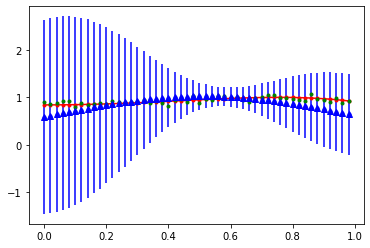

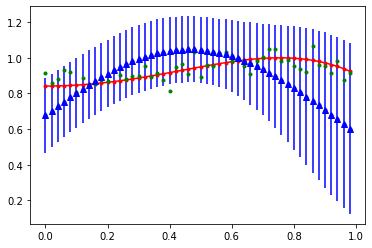

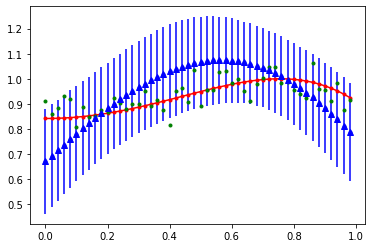

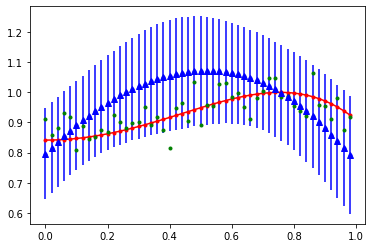

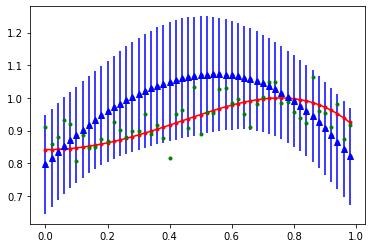

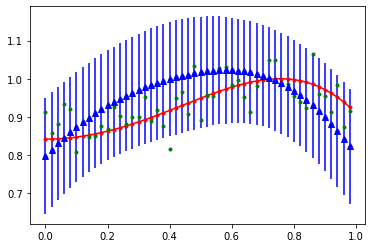

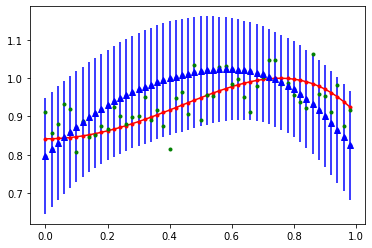

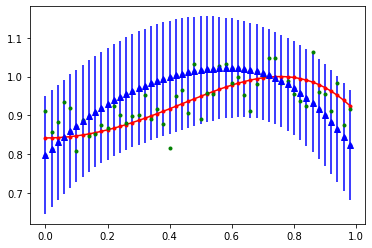

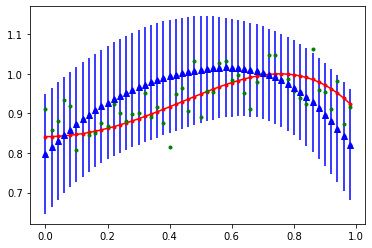

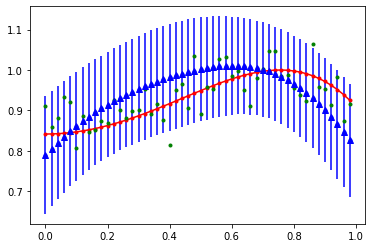

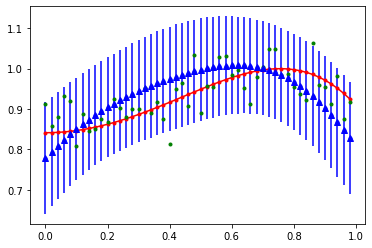

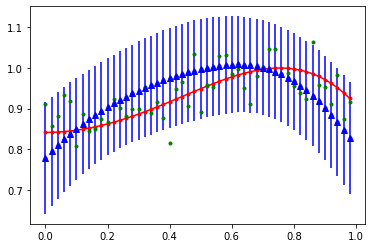

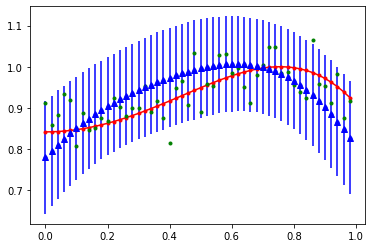

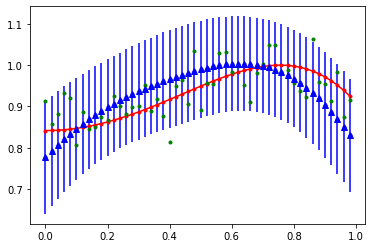

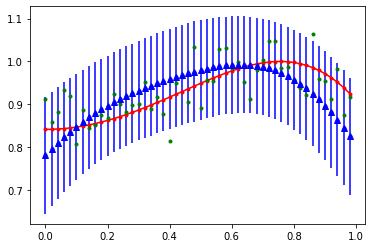

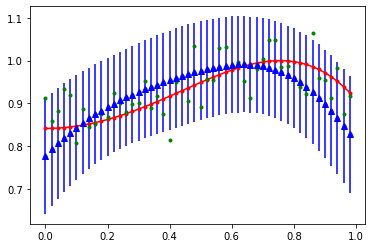

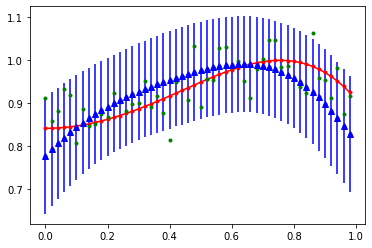

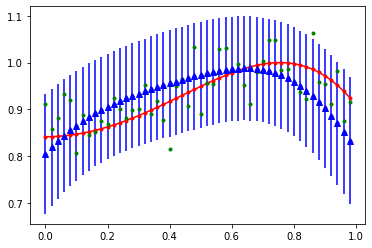

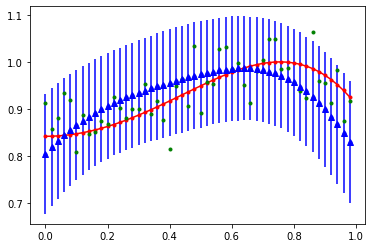

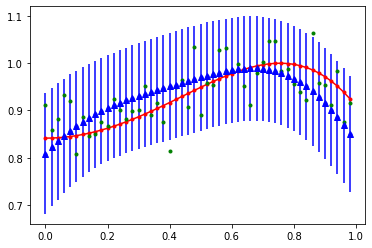

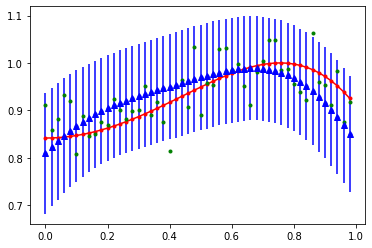

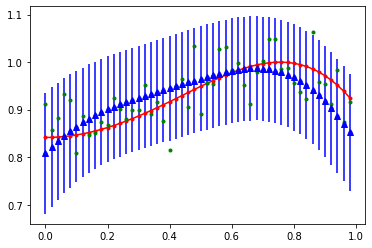

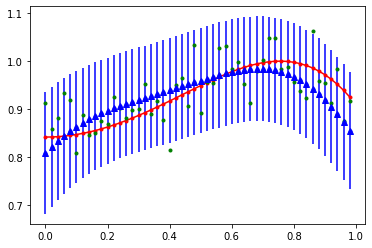

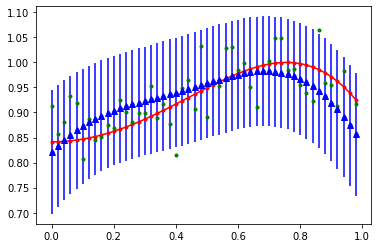

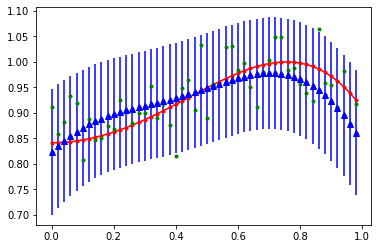

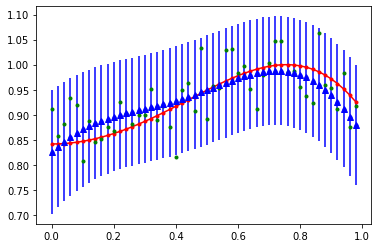

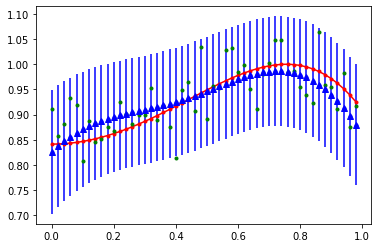

In [ ]:
#4.Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data
from random import sample
import numpy as np
M = 10
N = len(x)
range_of_data = 1
alfa = 1
beta = 10

F_2 = np.matrix(np.empty([N, M])) 
S_a = 0.4
for i in range(M):
    for j in range(N):
        F_2[j, i] = fay(x[j], get_mu(i, M), S_a)


II_n =  np.matrix(np.identity(M))        
S = (alfa*II_n)

w_0 = 0*np.matrix(np.empty([M, 1]))
random_numers = []
random_number = sample(range(0, 50), 50)
count = -1
for i in random_number:
    t1 =  beta * np.matmul(F_2[i].transpose(), F_2[i])
    count = count + 1
    S_new = S + t1
    tmp = np.linalg.inv(S_new)
    w_new = np.matmul(tmp, (np.matmul(S,w_0)+ beta * F_2[i].transpose() * t[i]))
    w_0 = w_new
    S = S_new
    y_new = np.matmul(F_2, w_new)
    S_s =[]
    for j in range(N):
        S_star_tmp = np.matmul(F_2[j], np.linalg.inv(S_new))
        S_star = (1/beta) + np.matmul(S_star_tmp,F_2[j].transpose())
        S_s.append(S_star[0,0])
        
    plt.plot(x, y_new, "b.")
    plt.errorbar(x, y_new, yerr =S_s, ecolor = 'b', fmt = 'b^')
    plt.plot(x, y, "r")
    plt.plot(x, y, "r.")
    plt.plot(x, t, "g.")
    
    plt.show()
#6. Show your best prediction results for all 50 data one by one

5.Experiment with your code by changing beta, and explain what beta is for and how it affects the results.


In our above reasoning (1/beta) is our standard deviation of likelihood. That means that the decreasing beta will make the standard deviation higher. In this case our error will be that hight the the observation of fitting curve becomes difficult. 

The above reasoning is expressed on a diagram below:


In [ ]:
from random import sample
import numpy as np
M = 10
N = len(x)
range_of_data = 1
alfa = 1
beta = 0.1

F_2 = np.matrix(np.empty([N, M])) 
S_a = 0.4
for i in range(M):
    for j in range(N):
        F_2[j, i] = fay(x[j], get_mu(i, M), S_a)


II_n =  np.matrix(np.identity(M))        
S = (alfa*II_n)

w_0 = 0*np.matrix(np.empty([M, 1]))
random_numers = []
random_number = sample(range(0, 50), 50)
count = -1
for i in random_number:
    t1 =  beta * np.matmul(F_2[i].transpose(), F_2[i])
    count = count + 1
    S_new = S + t1
    tmp = np.linalg.inv(S_new)
    w_new = np.matmul(tmp, (np.matmul(S,w_0)+ beta * F_2[i].transpose() * t[i]))
    w_0 = w_new
    S = S_new
    y_new = np.matmul(F_2, w_new)
    S_s =[]
    for j in range(N):
        S_star_tmp = np.matmul(F_2[j], np.linalg.inv(S_new))
        S_star = (1/beta) + np.matmul(S_star_tmp,F_2[j].transpose())
        S_s.append(S_star[0,0])
        
    plt.plot(x, y_new, "b.")
    plt.errorbar(x, y_new, yerr =S_s, ecolor = 'b', fmt = 'b^')
    plt.plot(x, y, "r")
    plt.plot(x, y, "r.")
    plt.plot(x, t, "g.")
    
    plt.show()

7.Explain why the predictive distribution is better than the original form of the full Bayesian inference (part I),

Predictive distribution gives us the advantage of showing the probability, not just of our results in training stage, but also in testing stage. Additionally given the training data we can interpolate or extrapolate the prediction of t and know the uncertainty of the prediction . 

8.Discuss the differences between p(t_new|t) and p(w|t).

p(t_new|t) is beneficial due to the fact that it gives us the Gaussian distribution for every possible value.This means we know the probability of all possible results and we know the most probable result as well. Contrary p(w|t) gives us the probability of our weight, thus how good our model selection is. The two above benefit for us on different levels of reasoning.